<a href="https://colab.research.google.com/github/NdindaLeech/IPWEEK4/blob/main/WK4LEECH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Data Cleaning and Analysis - Autolib dataset


## 1.0 Importing the necessary Libraries

In [ ]:
# Importing the libraries we will need 

# Importing the pandas library
# 
import pandas as pd

# Importing the numpy library
#
import numpy as np

## 1.1 Reading the Dataset from the CSV file



In [ ]:
#Read the data from the CSV file and creating the dataframe to be used
# 
df = pd.read_csv('Autolib_dataset.csv')

##1.2 Data Understanding processes

## 1.2.1 Previewing our Dataset


In [ ]:
# Previewing the first 10 rows of our data
# 
df.head(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


## 1.2.2 Accessing Information about the Dataset

In [ ]:
# Getting to know more about the dataset by accessing its information
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

##1.2.3 Data description

##1.2.3.1 Quantity of data provided

In [ ]:
df.shape
#This shows the data has 5000 observations and 25 attributes_this is the quantity of data

(5000, 26)

## 1.2.4 Explore given data

In [ ]:
#Using the describe() function to compute a summary of statistics pertaining to the DataFrame columns
df.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


##1.3 Data Preparation


##1.3.1 Changing Data to the right format


##1.3.1.1Creating a single column for the date

In [ ]:
#creating a single column for the date
df['Date'] = df[df.columns[20:23]].apply(
    lambda x: '-'.join(x.dropna().astype(str)),
    axis=1)
df.head(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,Date
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43,2018-4-8
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24,2018-4-6
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14,2018-4-3
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37,2018-4-4
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23,2018-4-8


## 1.3.1.2 creating a single column for time

In [ ]:
#Creating a single column for time
df['Time'] = df[df.columns[23:25]].apply(
    lambda x: ':'.join(x.dropna().astype(str)),
    axis=1)
df.head(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,Date,Time
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43,2018-4-8,11:43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24,2018-4-6,7:24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14,2018-4-3,20:14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37,2018-4-4,4:37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23,2018-4-8,17:23


##1.3.1.3 Creating one column for date and Time

In [ ]:
df['Date_Time'] = df[['Date', 'Time']].apply(lambda x: ' ' .join(x), axis=1)
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,Date,Time,Date_Time
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43,2018-4-8,11:43,2018-4-8 11:43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24,2018-4-6,7:24,2018-4-6 7:24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14,2018-4-3,20:14,2018-4-3 20:14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37,2018-4-4,4:37,2018-4-4 4:37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23,2018-4-8,17:23,2018-4-8 17:23


##1.3.1.4 converting to the right dtype

In [ ]:
#converting the Date_Time column into datatime format
import pandas as pd
from datetime import datetime, timedelta
from pandas import DataFrame
#df['Date_Time'] = df['Date_Time'].apply(lambda _: datetime.strptime(_,"%m/%d/%Y, %H:%M:%S"))
df['Date_Time'] = df['Date_Time'].astype('datetime64[ns]')
df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,Date,Time,Date_Time,Date_Time2
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43,2018-4-8,11:43,2018-04-08 11:43:00,2018-4-8 11:43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24,2018-4-6,7:24,2018-04-06 07:24:00,2018-4-6 7:24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14,2018-4-3,20:14,2018-04-03 20:14:00,2018-4-3 20:14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37,2018-4-4,4:37,2018-04-04 04:37:00,2018-4-4 4:37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23,2018-4-8,17:23,2018-04-08 17:23:00,2018-4-8 17:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26,2018-4-6,11:26,2018-04-06 11:26:00,2018-4-6 11:26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56,2018-4-4,16:56,2018-04-04 16:56:00,2018-4-4 16:56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1,2018-4-1,7:1,2018-04-01 07:01:00,2018-4-1 7:1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27,2018-4-4,17:27,2018-04-04 17:27:00,2018-4-4 17:27


##1.4 Data cleaning

#1.4.1 Checking for missing values

In [ ]:
num_rows = df.shape[0]
num_missing = num_rows - df.count() 
num_missing

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

## 1.4.2 Validity

#1.4.2.1 Removing Irrelevant Data

In [ ]:
#Removing Irrelevant Data_droping the following Columns Date_Time2
#df.drop(["Date_Time2", "year", "month","Subscription status","Scheduled at"], axis = 1, inplace = True)
#df.head()
#Drop additional columns
#df.drop(["day", "hour", "minute"], axis = 1, inplace = True)
df.drop(["Displayed comment"], axis = 1, inplace = True)
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Date,Time,Date_Time
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,2018-4-8,11:43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,2018-4-6,7:24,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,2018-4-3,20:14,2018-04-03 20:14:00
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,2018-4-4,4:37,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,2018-4-8,17:23,2018-04-08 17:23:00


##1.4.3 Checking for completeness of the data


In [ ]:
#from the results, there are no missing values anywhere
print(df.isnull().values.any())

False


In [ ]:
print(df.isnull().sum().sum())

0


##1.4.4 Checking for Consistency in the Dataset

In [ ]:
dl=list(df.columns)
dl
df_duplicate = pd.DataFrame(df, columns = [dl])
print(df_duplicate)


# Identifying which observations are duplicates
df_non_duplicates = df_duplicate.drop_duplicates()

# Let's see these non-duplicate files
print(df_non_duplicates)

     Address Cars Bluecar counter Utilib counter  ... Status Date Time Date_Time
0        NaN  NaN             NaN            NaN  ...    NaN  NaN  NaN       NaN
1        NaN  NaN             NaN            NaN  ...    NaN  NaN  NaN       NaN
2        NaN  NaN             NaN            NaN  ...    NaN  NaN  NaN       NaN
3        NaN  NaN             NaN            NaN  ...    NaN  NaN  NaN       NaN
4        NaN  NaN             NaN            NaN  ...    NaN  NaN  NaN       NaN
...      ...  ...             ...            ...  ...    ...  ...  ...       ...
4995     NaN  NaN             NaN            NaN  ...    NaN  NaN  NaN       NaN
4996     NaN  NaN             NaN            NaN  ...    NaN  NaN  NaN       NaN
4997     NaN  NaN             NaN            NaN  ...    NaN  NaN  NaN       NaN
4998     NaN  NaN             NaN            NaN  ...    NaN  NaN  NaN       NaN
4999     NaN  NaN             NaN            NaN  ...    NaN  NaN  NaN       NaN

[5000 rows x 20 columns]
  

##1.4.5 Checking for Uniformity

##1.4.5.1 Data type conversions

In [ ]:
 #Convert the relevant columns from strings to float
 #Date time conversion was done earlier
 df = df.infer_objects()
 df.info()

##1.4.5.2 standardization

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head(5)

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,date,time,date_time
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,2018-4-8,11:43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,2018-4-6,7:24,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,2018-4-3,20:14,2018-04-03 20:14:00
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,2018-4-4,4:37,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,2018-4-8,17:23,2018-04-08 17:23:00


##1.4.6 Checking for Accuracy

In [ ]:
#comparing the car and blue_car counter
def Check(df):
   if df['cars']== df['bluecar_counter']:
      return "True"
   else:
      return "False" 

#df['accuracycheck'] = df.apply(Check, axis=1)
#df.value_counts()
#values = df['accuracycheck'].value_counts().keys().tolist()
counts = df['cars'].value_counts()
counts1=counts.sum()
counts1

5000

In [ ]:
#checking for accuracy in the geo spot column
gmax=df['geo_point'].max()
gmin=df['geo_point'].min()
gmax
gmin


'48.7006549, 2.4828313'

##1.5 Exporting the cleaned dataset

In [ ]:
df.to_csv('auto_cleaned.csv')

##2.0 Data Analysis

##2.1 Importing Libraries for use in data analysis

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
% matplotlib inline 
import seaborn as sns

##2.2 Uploading the cleaned dataset


In [5]:
dfc = pd.read_csv('auto_cleaned.csv')

##2.3 Previewing the Cleaned Dataset

In [ ]:
dfc.head()

,Unnamed: 0,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,date,time,date_time,accuracycheck
0,0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,2018-4-8,11:43,2018-04-08 11:43:00,True
1,1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,2018-4-6,7:24,2018-04-06 07:24:00,True
2,2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,2018-4-3,20:14,2018-04-03 20:14:00,True
3,3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,2018-4-4,4:37,2018-04-04 04:37:00,True
4,4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,2018-4-8,17:23,2018-04-08 17:23:00,True


##2.4 Getting Information about the cleaned dataset

In [39]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          5000 non-null   int64         
 1   address             5000 non-null   object        
 2   cars                5000 non-null   int64         
 3   bluecar_counter     5000 non-null   int64         
 4   utilib_counter      5000 non-null   int64         
 5   utilib_1.4_counter  5000 non-null   int64         
 6   charge_slots        5000 non-null   int64         
 7   charging_status     5000 non-null   object        
 8   city                5000 non-null   object        
 9   id                  5000 non-null   object        
 10  kind                5000 non-null   object        
 11  geo_point           5000 non-null   object        
 12  postal_code         5000 non-null   int64         
 13  public_name         5000 non-null   object      

##2.5 Acquiring different aggregate values from the cleaned data sets
 

In [ ]:
#Listing the different cities
dfc.groupby(['city']).groups.keys()

dict_keys(['Alfortville', 'Antony', 'Arcueil', 'Argenteuil', 'AsniÃ¨res-sur-Seine', 'Aubervilliers', 'Aulnay-sous-bois', 'Bagneux', 'Bagnolet', 'Bezons', 'BiÃ¨vres', 'Bois-Colombes', 'Boulogne-Billancourt', 'Bourg-la-Reine', 'Cachan', 'Champigny-sur-Marne', 'Charenton-le-Pont', 'Chaville', 'ChÃ¢tenay-Malabry', 'ChÃ¢tillon', 'Clamart', 'Clichy la garenne', 'Clichy-la-Garenne', 'Clichy-sous-Bois', 'Colombes', 'Courbevoie', 'CrÃ©teil', 'Drancy', 'Dugny', 'Enghien-les-Bains', 'Epinay-sur-Seine', 'Fontenay-Sous-Bois', 'Fontenay-aux-Roses', 'Garches', 'Gennevilliers', 'Guyancourt', 'Issy-les-Moulineaux', 'Joinville-le-Pont', 'La Garenne-Colombes', 'Le Blanc-Mesnil', 'Le Bourget', 'Le Chesnay', 'Le Plessis-Robinson', 'Le PrÃ©-Saint-Gervais', 'Les Lilas', 'Levallois-Perret', 'Limeil-BrÃ©vannes', 'Maisons-Alfort', 'Malakoff', 'Meudon', 'Meudon-la-ForÃªt', 'Montfermeil', 'Montreuil', 'Montrouge', 'Nanterre', 'Neuilly-Plaisance', 'Neuilly-sur-Seine', 'Nogent-sur-Marne', 'Noisy-le-Sec', 'Pantin', 

In [ ]:
#Getting the top number of cities using the bluecars
dfc.groupby('city')['bluecar_counter'].sum().sort_values(ascending=False).head(5)

city
Paris                  5145
Nanterre                464
Issy-les-Moulineaux     322
CrÃ©teil                319
Rueil-Malmaison         295
Name: bluecar_counter, dtype: int64

In [ ]:
#Getting which city least uses the bluecar
dfc.groupby('city')['bluecar_counter'].sum().sort_values(ascending=False).tail(20)

city
Rungis                   21
Charenton-le-Pont        20
Meudon-la-ForÃªt         19
Montfermeil              19
Le PrÃ©-Saint-Gervais    18
Ville-d'Avray            17
Saclay                   17
Neuilly-sur-Seine        17
Saint-Maurice            15
Bourg-la-Reine           14
Bezons                   14
Clichy la garenne        12
Saint-Denis              12
Vaucresson               10
Saint-Maur                4
Clichy-sous-Bois          0
Sucy-en-Brie              0
Guyancourt                0
Epinay-sur-Seine          0
BiÃ¨vres                  0
Name: bluecar_counter, dtype: int64

In [138]:
#assessing which postal code has the highest number of blue car usage
dfc.groupby('postal_code')['bluecar_counter'].sum().sort_values(ascending=False).head(10)

postal_code
75015    609
75016    595
75017    529
92000    464
75020    442
75011    382
75019    346
75013    342
92130    322
94000    319
Name: bluecar_counter, dtype: int64

In [ ]:
#assessing which station has the highest number of blue car usage
#dfc.groupby('id')['bluecar_counter'].sum().sort_values(ascending=False).head(5)
dfc[['id','postal_code']].head()
#dfc[['id','postal_code']].head()
#dfc.groupby('id')['postal_code']




,id,postal_code
0,paris-suffren-2,75015
1,paris-raymondlosserand-145,75014
2,lebourget-johnfitzgeraldkennedy-2,93350
3,paris-eugeneoudine-51,75013
4,paris-portedechamperret-6,75017


In [ ]:
dfc.groupby('id')['bluecar_counter'].sum().sort_values(ascending=False)

id
fontenayauxroses-robertmarchand-32     50
leplessisrobinson-galilee-16           49
fontenayauxroses-lombard-20            47
fontenayauxroses-divisionleclerc-31    43
paris-philippeauguste-126              42
                                       ..
paris-francois1er-38                    0
paris-flandre-61                        0
paris-faubourgmontmartre-31             0
paris-etoilefoch-parking                0
alfortville-blanqui-61                  0
Name: bluecar_counter, Length: 1105, dtype: int64

In [139]:
#Checking which is the most popular time to return/pick a bluecar
dfc.groupby('date_time')['bluecar_counter'].sum().sort_values(ascending=False).head(5)


date_time
2018-04-06 01:59:00    15
2018-04-02 10:43:00    15
2018-04-06 22:29:00    15
2018-04-03 13:48:00    15
2018-04-05 21:49:00    15
Name: bluecar_counter, dtype: int64

In [ ]:
#Checking which is the most popular time to return/pick a bluecar
dfc.groupby('time')['bluecar_counter'].sum().sort_values(ascending=False).head(5)

time
1:33     34
22:29    31
5:52     30
9:47     30
5:9      28
Name: bluecar_counter, dtype: int64

In [21]:
DC = ['Paris']
dts=dfc[dfc.city.isin(DC) & dfc['date_time']]
dts['bluecar_counter'].sum()

5145

In [30]:
dfc['bluecar_counter'].groupby([dfc['city'], dfc['postal_code']]).sum().sort_values(ascending=False)

city              postal_code
Paris             75015          609
                  75016          595
                  75017          529
Nanterre          92000          464
Paris             75020          442
                                ... 
BiÃ¨vres          91570            0
Clichy-sous-Bois  93390            0
Epinay-sur-Seine  93800            0
Sucy-en-Brie      94370            0
Guyancourt        78280            0
Name: bluecar_counter, Length: 111, dtype: int64

In [16]:
#df['bluecar_counter'].groupby([df['city']]).get_group('Paris').sum()
#df['bluecar_counter'].groupby([df['city']]).sum().sort_values(ascending=False)
dfc['bluecar_counter'].groupby([dfc['date_time']]).sum().sort_values(ascending=False)

date_time
2018-04-06 01:59:00    15
2018-04-02 10:43:00    15
2018-04-06 22:29:00    15
2018-04-03 13:48:00    15
2018-04-05 21:49:00    15
                       ..
2018-04-05 06:08:00     0
2018-04-05 06:32:00     0
2018-04-05 06:55:00     0
2018-04-05 07:24:00     0
2018-04-01 00:00:00     0
Name: bluecar_counter, Length: 4120, dtype: int64

In [ ]:
blue_car_by_city = dfc['bluecar_counter'].groupby(dfc['city']).sum().sort_values(ascending=False)
blue_car_by_city

city
Paris                  5145
Nanterre                464
Issy-les-Moulineaux     322
CrÃ©teil                319
Rueil-Malmaison         295
                       ... 
Clichy-sous-Bois          0
Sucy-en-Brie              0
Guyancourt                0
Epinay-sur-Seine          0
BiÃ¨vres                  0
Name: bluecar_counter, Length: 88, dtype: int64

In [ ]:
blue_car_by_date = dfc['bluecar_counter'].groupby(dfc['date']).sum().sort_values(ascending=False)
blue_car_by_date

date
2018-4-3    1454
2018-4-5    1406
2018-4-9    1369
2018-4-1    1366
2018-4-4    1351
2018-4-2    1288
2018-4-6    1225
2018-4-8    1198
2018-4-7    1011
Name: bluecar_counter, dtype: int64

In [ ]:
blue_car_by_time = dfc['bluecar_counter'].groupby(dfc['time']).sum().sort_values(ascending=False)
blue_car_by_time

time
1:33     34
22:29    31
5:52     30
9:47     30
5:9      28
         ..
22:51     0
18:2      0
10:52     0
3:19      0
11:41     0
Name: bluecar_counter, Length: 1394, dtype: int64

In [48]:
blue_car_by_day = dfc['bluecar_counter'].groupby(dfc['day_of_week']).sum().sort_values(ascending=False)
blue_car_by_day

day_of_week
Monday       2657
Sunday       2564
Tuesday      1454
Thursday     1406
Wednesday    1351
Friday       1225
Saturday     1011
Name: bluecar_counter, dtype: int64

In [47]:
#Adding day of the week column to the dfc dataframe
dfc['date'] = dfc['date'].astype('datetime64[ns]')
#dfc['day_of_week'] = dfc['date'].dt.dayofweek
dfc['day_of_week'] = dfc['date'].dt.day_name()
dfc.head(5)

,Unnamed: 0,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,date,time,date_time,accuracycheck,day_of_week
0,0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,2018-04-08,11:43,2018-04-08 11:43:00,True,Sunday
1,1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,2018-04-06,7:24,2018-04-06 07:24:00,True,Friday
2,2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,2018-04-03,20:14,2018-04-03 20:14:00,True,Tuesday
3,3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,2018-04-04,4:37,2018-04-04 04:37:00,True,Wednesday
4,4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,2018-04-08,17:23,2018-04-08 17:23:00,True,Sunday


In [ ]:

#dfc['time2'] = pd.to_datetime(dfc['time'],format= '%H:%M' ).dt.time
#dfc['pick_return'] = dfc['time2'] - dfc['time2'].shift(-1)
#dfc['pick_return2'] = dfc['time2'] - dfc['time2'].shift(-1)
dfc["diff"]=dfc["time2"].diff()
dfc.head(10)

In [71]:
dfc["diff"]=dfc["bluecar_counter"].diff()
dfc.head()

,Unnamed: 0,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,date,time,date_time,accuracycheck,day_of_week,pick_return,time2,diff
0,0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,2018-04-08,11:43,2018-04-08 11:43:00,True,Sunday,2 days 04:19:00,11:43:00,NaN
1,1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,2018-04-06,7:24,2018-04-06 07:24:00,True,Friday,2 days 11:10:00,07:24:00,6.0
2,2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,2018-04-03,20:14,2018-04-03 20:14:00,True,Tuesday,-1 days +15:37:00,20:14:00,-3.0
3,3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,2018-04-04,4:37,2018-04-04 04:37:00,True,Wednesday,-5 days +11:14:00,04:37:00,0.0
4,4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,2018-04-08,17:23,2018-04-08 17:23:00,True,Sunday,2 days 10:21:00,17:23:00,0.0


In [79]:
#Total number of cars not picked

dfc['bluecar_counter'].groupby([dfc['diff']]).get_group(0).sum()

1231

In [84]:
#Vechiles available for renting
dfc['bluecar_counter'].size

5000

5000

In [88]:
dfc.groupby(['diff']).filter(lambda x: sum(x['bluecar_counter']) > 0).head()
dfc

,Unnamed: 0,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,date,time,date_time,accuracycheck,day_of_week,pick_return,time2,diff
0,0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,2018-04-08,11:43,2018-04-08 11:43:00,True,Sunday,2 days 04:19:00,11:43:00,NaN
1,1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,2018-04-06,7:24,2018-04-06 07:24:00,True,Friday,2 days 11:10:00,07:24:00,6.0
2,2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,2018-04-03,20:14,2018-04-03 20:14:00,True,Tuesday,-1 days +15:37:00,20:14:00,-3.0
3,3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,2018-04-04,4:37,2018-04-04 04:37:00,True,Wednesday,-5 days +11:14:00,04:37:00,0.0
4,4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,2018-04-08,17:23,2018-04-08 17:23:00,True,Sunday,2 days 10:21:00,17:23:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,3,station,ok,2018-04-06,11:26,2018-04-06 11:26:00,True,Friday,1 days 18:30:00,11:26:00,2.0
4996,4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2,station,ok,2018-04-04,16:56,2018-04-04 16:56:00,True,Wednesday,3 days 09:55:00,16:56:00,2.0
4997,4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,4,station,ok,2018-04-01,7:1,2018-04-01 07:01:00,True,Sunday,-4 days +13:34:00,07:01:00,-3.0
4998,4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,ok,2018-04-04,17:27,2018-04-04 17:27:00,True,Wednesday,-4 days +07:25:00,17:27:00,1.0


In [105]:
#number of vehicles picked 
dfc2=dfc.groupby('bluecar_counter').filter(lambda x : x['diff'].mean() > 0)
dfc21=len(dfc2)/2
dfc21


1131.0

In [101]:
#number of vehicles not picked 
dfc2=dfc.groupby('bluecar_counter').filter(lambda x : x['diff'].mean() < 0)
len(dfc2)

2738

##3.0 Plots and Checking for outliers


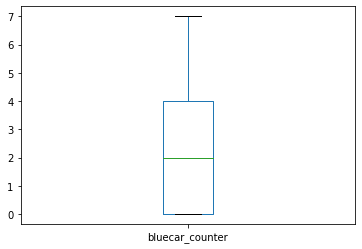

In [ ]:
#Creating a box plot of the variable 'bluecar_counter'
dfc.boxplot(column =['bluecar_counter'], grid = False) 

In [11]:
grp = dfc.groupby('postal_code') 

grp['bluecar_counter'].agg([np.sum]).head()


,sum
postal_code,
75001,31
75002,42
75003,65
75004,45
75005,112


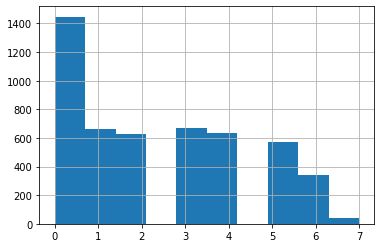

In [129]:
dfc.bluecar_counter.hist()

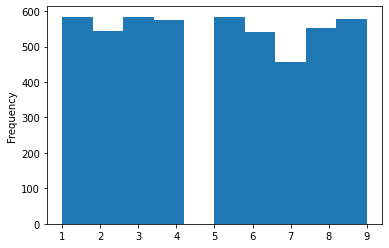

In [132]:
plt.clf()
dfc['date'].map(lambda d: d.day).plot(kind='hist')
plt.show()

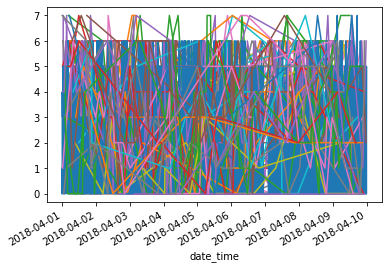

In [137]:
fig, ax = plt.subplots()
dfc.groupby('city').plot(x='date_time', y='bluecar_counter', ax=ax, legend=False)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


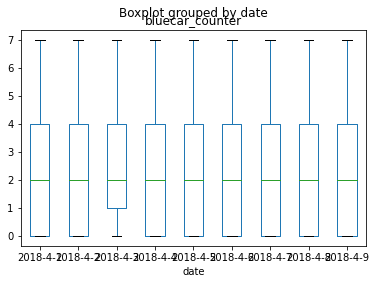

In [ ]:
dfc.boxplot(column =['bluecar_counter'], by ='date', grid = False)

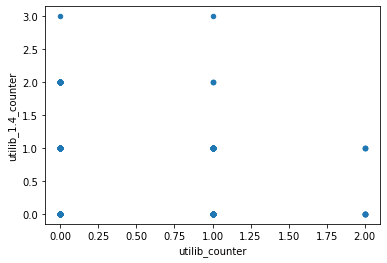

In [114]:
dfc.plot(x ='utilib_counter', y='utilib_1.4_counter', kind = 'scatter')
plt.show()

##3.1 Assessing the most popular time for pick up and returning the cars


In [142]:
dfc.groupby("time")["diff"].sum().sort_values(ascending=True)

time
21:26   -17.0
18:44   -17.0
8:51    -17.0
11:22   -17.0
6:55    -16.0
         ... 
9:47     16.0
1:13     16.0
4:17     18.0
13:48    18.0
8:15     22.0
Name: diff, Length: 1394, dtype: float64